### Import Packages

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from skimage import exposure
import cv2
import os

### Load Images

In [17]:
def load_image(image_path):
    return plt.imread(file_path)

### Convert Images to Grayscale

In [18]:
def rgb2gray(image):
    return np.mean(image, axis=2)

### Scale Pixel Values between 0 and 1

In [26]:
def normalize(image):
    return image / 255

### Resize Images

In [33]:
def resize(image, size):
    return cv2.resize(image, size)

### Histogram Equalization

In [41]:
def histEqual(image):
    return cv2.equalizeHist(image)

### Unsharp Masking

In [59]:
def unsharp_mask(image):
    img_blur = cv2.GaussianBlur(image,(7,7),0)
    return image + (image - img_blur)

### Preprocess Images

In [63]:
root_dir = './data/Bone Break Classification'

# Initialize dictionary to store images
images = {}

# Iterates through the different bone fracture folders
for folder in os.listdir(root_dir):

    folder_path = os.path.join(root_dir, folder)
    images[folder] = {}

    # Iterates through the test and train folders for each bone fracture type
    for subfolder in os.listdir(folder_path):

        if subfolder.startswith('.'):
            continue
            
        subfolder_path = os.path.join(folder_path, subfolder)
        images[folder][subfolder] = []

        # Iterates through images in folder
        for file in os.listdir(subfolder_path):

            if file.endswith('.jpg'):

                file_path = os.path.join(subfolder_path, file)
                
                img = load_image(file_path)
                img = rgb2gray(img)
                img = histEqual(np.array(img, dtype=np.uint8))
                img = normalize(img)
                img = resize(img, (256, 256))
                img = unsharp_mask(img)
                
                images[folder][subfolder].append(img)

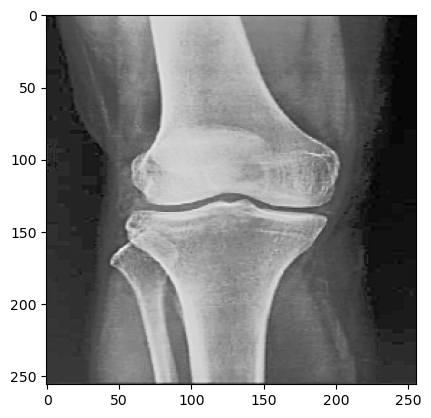

In [66]:
plt.imshow(images['Avulsion fracture']['Train'][10], cmap='gray')

### Feature Extraction

### Edge Detection

In [68]:
def get_edges(image, lower_thresh, upper_thresh):
    return cv2.Canny(image, lower_thresh, upper_thresh)

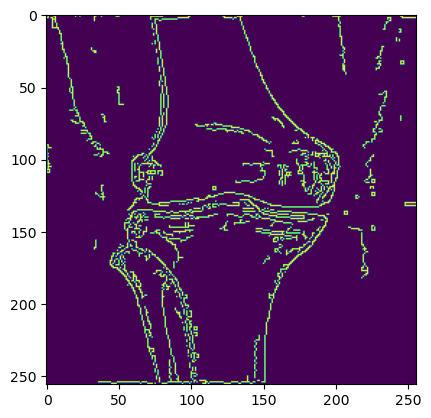

In [103]:
img_int = np.array(images['Avulsion fracture']['Train'][10]*255, dtype=np.uint8)
edges = get_edges(img_int, 100, 200)
plt.imshow(edges)
pass

### HOG

In [101]:
def get_hog(image):
    fd, hog_image = feature.hog(image=image, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), visualize=True)

    return hog_image

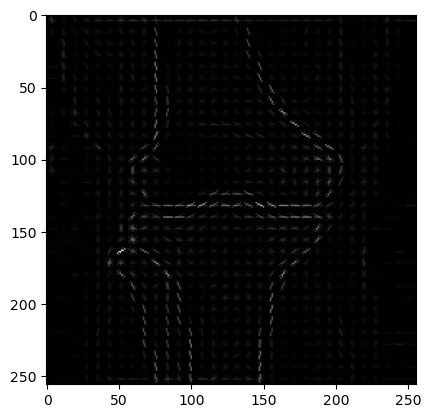

In [102]:
hog_image = get_hog(images['Avulsion fracture']['Train'][10])
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled, cmap='gray')
pass

### Histogram of Intensities

In [112]:
def get_hoi(image):
    data = plt.hist(image.ravel(), bins=256, range=[0, 1])
    return data

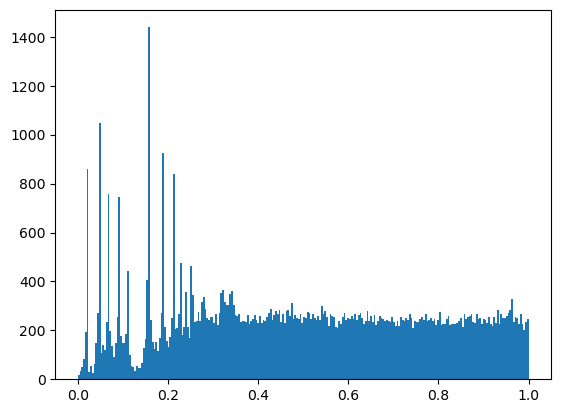

In [114]:
data = get_hoi(images['Avulsion fracture']['Train'][10])

### Local Binary Pattern

In [121]:
def get_lbp(image):
    radius = 3
    return feature.local_binary_pattern(image, 5*radius, radius)

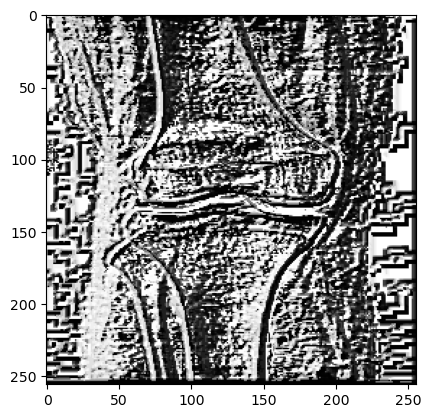

In [123]:
plt.imshow(get_lbp(images['Avulsion fracture']['Train'][10]*255), cmap='gray')